# Unpaired two-sample t-test

## Libraries and settings

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Read appartment and house data

In [3]:
df = pd.read_csv('../04_Preparing & Storing Data/dataset_homegate_enriched.csv', sep=',', encoding='utf-8')
df = df.drop('Unnamed: 0', axis=1)

# Show categories of 'Type'
print(df['type'].value_counts())

# Show first rows in dataframe
df.head()

Wohnung    6214
Haus       5088
Name: type, dtype: int64


,web-scraper-order,web-scraper-start-url,price_raw,qubic_meter_raw,rooms_raw,full_address,description,type,rooms,area,...,central,price_per_m2,price_cat,area_cat,Ortschaftsname,BfS_Id,Kantonskürzel,Kantonssteuerfuss,Gemeindesteuerfuss,steuersatz_kombiniert
0,1672673926-34302,https://www.homegate.ch/kaufen/wohnung/land-sc...,1’000’000.–,110m2,3.5Zi,6963 Pregassona,IN ZONA RESIDENZIALE TRANQUILLA E SOLEGGIATA P...,Wohnung,3.5,110,...,0.0,9090.91,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
1,1672673926-34301,https://www.homegate.ch/kaufen/wohnung/land-sc...,500’000.–,80m2,3.5Zi,"Via Ceresio 39A, 6963 Pregassona","A PREGASSONA, PROPONIAMO IN VENDITA UN LUMINOS...",Wohnung,3.5,80,...,0.0,6250.00,medium,50 - 99,Pregassona,5192,TI,97.0,77.0,174.0
2,1672673272-29951,https://www.homegate.ch/kaufen/wohnung/land-sc...,1’200’000.–,141m2,4.5Zi,"Via Vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,141,...,1.0,8510.64,medium,100-149,Pregassona,5192,TI,97.0,77.0,174.0
3,1672673272-29952,https://www.homegate.ch/kaufen/wohnung/land-sc...,2’360’000.–,238m2,4.5Zi,"Via vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,238,...,1.0,9915.97,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
4,1672673816-33571,https://www.homegate.ch/kaufen/wohnung/land-sc...,270’000.–,30m2,1Zi,"via Ceresio, 6963 Pregassona",A PREGASSONA COMODISSIMO MONOLOCALE AL SECONDO...,Wohnung,1.0,30,...,0.0,9000.00,medium,0 - 49,Pregassona,5192,TI,97.0,77.0,174.0


## Comparing Houses and Apartments

### Create grouped boxplot (groups = type, values = price_per_m2)

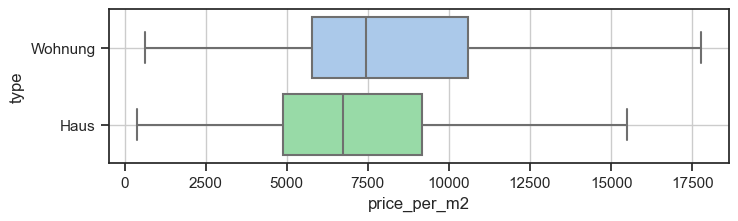

In [4]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="type",
                 palette=['b', 'g'],
                 data=df,
                 orient='h',
                 showfliers=False)
plt.grid()
plt.show()

### Unpaired two-sample t-test

In [10]:
# Create subsets (groups)
apartment = df.loc[df['type'] == 'Wohnung']
house = df.loc[df['type'] == 'Haus']

# Create t-test
result = stats.ttest_ind(apartment['price_per_m2'], house['price_per_m2'])

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(5))

Test-statistic: 13.64011 p-value 0.0


### Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices per m2 of houses and apartments differ. Note that, from the t-test above, it is not clear which type has higher or lower prices. It only shows that there is a statistically significant (5% significance level) difference between prices.</p>

### Create grouped boxplot (groups = luxurious, values = price_per_m2)

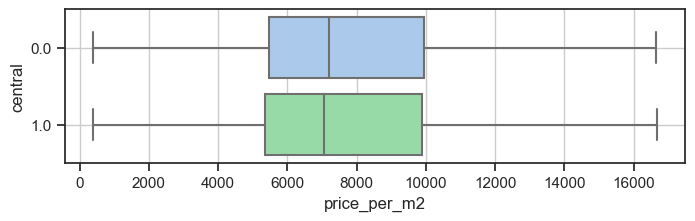

In [6]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="central",
                 palette=['b', 'g'],
                 data=df,
                 orient='h',
                 showfliers=False)
plt.grid()
plt.show()

### Unpaired two-sample t-test

In [7]:
# Create subsets (groups)
not_central = df.loc[df['central'] == 0]
central = df.loc[df['central'] == 1]

# Create t-test
result = stats.ttest_ind(not_central['price_per_m2'], 
                         central['price_per_m2'])

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(5))

Test-statistic: -0.03401 p-value 0.97287


### Interpretation of result

<p> Because the p-value is higher than 0.05, the null hypothesis cannot be rejected, i.e. there is evidence that the prices per m2 do not differ between houses and apartments in central locations and those that are not. Note that, from the t-test above, it is not clear which group of listings show lower or higher prices. It only shows that there is a statistically significant (5% significance level) difference between prices.</p>